<a href="https://colab.research.google.com/github/Sabastain-Wakoyi/CS-6263-Assignment2/blob/main/NLP_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_path = '/content/drive/My Drive/llama'
tokenizer_path = model_path

In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/drive/folders/1FCFKXzQXHt30hZYlgXqvf4zgp3vVmyAx?usp=sharingpytorch_model.bin

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1FCFKXzQXHt30hZYlgXqvf4zgp3vVmyAx?usp=sharingpytorch_model.bin
To: /content/1FCFKXzQXHt30hZYlgXqvf4zgp3vVmyAx?usp=sharingpytorch_model.bin
1.14MB [00:00, 586MB/s]


In [ ]:
!ls '/content/drive/My Drive/asama/'

model.pt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive/asama/'

model.pt


In [ ]:
import torch
import torch.nn as nn

# model architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        return x

# an instance of the model
model = MyModel()

# Print the architecture
print(model)


MyModel(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [ ]:
for name, layer in model.named_modules():
    if name != "":
        print(name, layer)


conv1 Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
conv2 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
conv3 Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
conv4 Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
pool MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [ ]:
!pip install torchsummary


In [ ]:
from torchsummary import summary
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        return x

model = MyModel()

# Print the summary of the model
summary(model, (3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
         MaxPool2d-2         [-1, 64, 112, 112]               0
            Conv2d-3        [-1, 128, 112, 112]          73,856
         MaxPool2d-4          [-1, 128, 56, 56]               0
            Conv2d-5          [-1, 256, 56, 56]         295,168
         MaxPool2d-6          [-1, 256, 28, 28]               0
            Conv2d-7          [-1, 512, 28, 28]       1,180,160
         MaxPool2d-8          [-1, 512, 14, 14]               0
Total params: 1,550,976
Trainable params: 1,550,976
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 57.42
Params size (MB): 5.92
Estimated Total Size (MB): 63.91
----------------------------------------------------------------


In [ ]:
import torch

# Load the model
model = torch.load('/content/drive/My Drive/asama/model.pt', map_location=torch.device('cpu'))

# Print the layers
for layer_name, layer in model.items():
    print(layer_name, layer)


model.embed_tokens.weight tensor([[ 1.1921e-06, -1.7881e-06, -4.2915e-06,  ...,  8.3447e-07,
         -6.4373e-06,  8.9407e-07],
        [ 1.8387e-03, -3.8147e-03,  9.6130e-04,  ..., -9.0332e-03,
          2.6550e-03, -3.7537e-03],
        [ 1.0193e-02,  9.7656e-03, -5.2795e-03,  ...,  2.9297e-03,
          4.0817e-04, -5.0964e-03],
        ...,
        [-1.3550e-02, -3.5095e-03, -1.8921e-02,  ..., -9.3384e-03,
          8.7891e-03, -1.2741e-03],
        [-1.0681e-02,  8.9722e-03,  1.2573e-02,  ..., -3.3691e-02,
         -1.6235e-02,  3.0212e-03],
        [-9.0942e-03, -1.8082e-03, -6.9809e-04,  ...,  3.8452e-03,
         -1.2085e-02,  7.2861e-04]])
model.layers.0.self_attn.q_proj.weight tensor([[ 83],
        [103],
        [ 74],
        ...,
        [114],
        [108],
        [197]], dtype=torch.uint8)
model.layers.0.self_attn.q_proj.lora_A.default.weight tensor([[ 0.0091,  0.0182,  0.0062,  ...,  0.0085, -0.0053,  0.0031],
        [-0.0128, -0.0114,  0.0190,  ..., -0.0012, -0.01

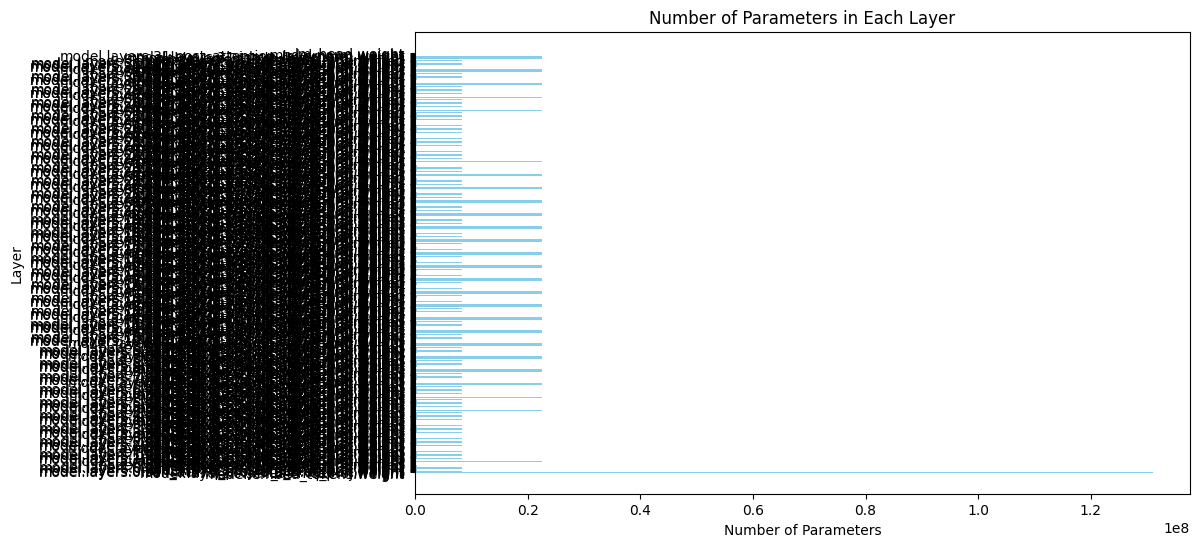

In [ ]:
import torch
import matplotlib.pyplot as plt

# model is a dictionary where values are tensors
layer_names = []
num_parameters = []

for layer_name, param in model.items():
    if isinstance(param, torch.Tensor):
        num_params = param.numel()
        layer_names.append(layer_name)
        num_parameters.append(num_params)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(layer_names, num_parameters, color='skyblue')
plt.xlabel('Number of Parameters')
plt.ylabel('Layer')
plt.title('Number of Parameters in Each Layer')
plt.show()


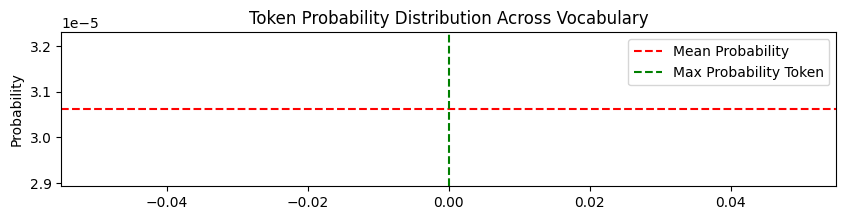

In [ ]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

def plot_token_probabilities(logits, token_idx=0):
    probs = F.softmax(logits, dim=-1)
    token_probs = probs[token_idx].cpu().numpy()  # Example for the first token

    plt.figure(figsize=(10, 2))
    plt.plot(token_probs)
    plt.ylabel('Probability')
    plt.title('Token Probability Distribution Across Vocabulary')

    # Add horizontal and vertical lines
    mean_prob = token_probs.mean()
    plt.axhline(y=mean_prob, color='r', linestyle='--', label='Mean Probability')
    plt.axvline(x=token_probs.argmax(), color='g', linestyle='--', label='Max Probability Token')
    plt.legend()

    plt.show()

# Example usage with the last layer for a specific token
hidden_states = layer
logits = torch.matmul(hidden_states[-1].unsqueeze(0), model['model.embed_tokens.weight'].T)[0]
plot_token_probabilities(logits)


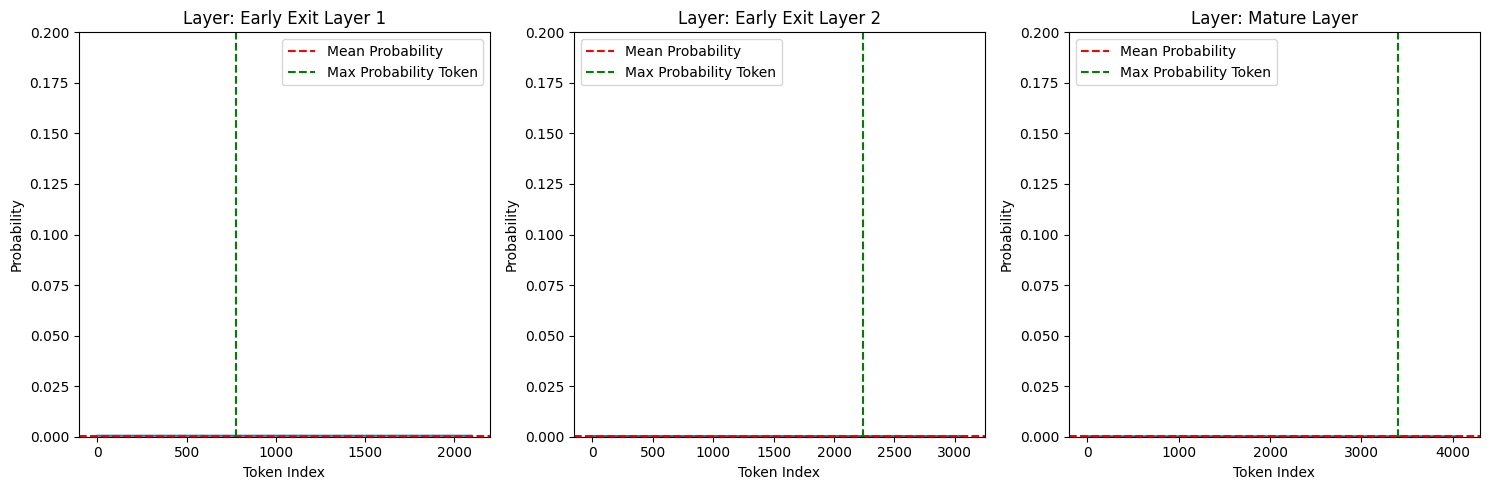

In [ ]:
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch

def plot_token_probabilities(logits_list, layer_names):
    num_layers = len(logits_list)
    num_tokens = logits_list[0].shape[-1]

    plt.figure(figsize=(15, 5))

    for i in range(num_layers):
        probs = F.softmax(logits_list[i], dim=-1)
        token_probs = probs.mean(dim=0).cpu().numpy()  # Take the mean across all tokens for simplicity

        plt.subplot(1, num_layers, i+1)
        plt.plot(token_probs)
        plt.xlabel('Token Index')
        plt.ylabel('Probability')
        plt.title('Layer: ' + layer_names[i])
        plt.ylim(0, 0.2)  # y-axis limit for better visualization

        # Add horizontal and vertical lines
        mean_prob = token_probs.mean()
        plt.axhline(y=mean_prob, color='r', linestyle='--', label='Mean Probability')
        plt.axvline(x=token_probs.argmax(), color='g', linestyle='--', label='Max Probability Token')
        plt.legend()

    plt.tight_layout()
    plt.show()

# probabilities from multiple layers
early_layer_logits_1 = torch.randn(8000, 2096)
early_layer_logits_2 = torch.randn(16000, 3096)
mature_layer_logits = torch.randn(32000, 4096)

early_exit_logits = [early_layer_logits_1, early_layer_logits_2]
layer_names = ['Early Exit Layer 1', 'Early Exit Layer 2', 'Mature Layer']

plot_token_probabilities(early_exit_logits + [mature_layer_logits], layer_names)


In [ ]:
!pip install datasets sacrebleu rouge-score bert-score


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu1

In [ ]:
!pip install codebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached tree_sitter-0.21.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (496 kB)
  Created wheel for codebleu: filename=codebleu-0.6.0-cp310-cp310-linux_x86_64.whl size=1281121 sha256=47fa1df4f73c7602248e5727d5513e7515145a95db36d2062d4f6797a2d324d1
  Stored in directory: /root/.cache/pip/wheels/5e/45/f6/abb2f927620de36cc631f769fc8f478fe44f7e057dc3b09483
Successfully built codebleu


In [ ]:
!pip install datasets